# Case Study 2: Logistic Regression 
## By Allen Hoskins and Brittany Lewandowski 

# Data Pre-Processing:

In [2]:
#Importing in required libraries for this case study:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectPercentile,f_regression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import seaborn as sns
import statsmodels

In [3]:
# Reading diabetes data set from Desktop:

diabetes_data= pd.read_csv(r'.././data_sets/diabetic_data.csv')

In [4]:
# Viewing our imported diabetes data set: 

display(diabetes_data.head())
display(diabetes_data.info())
display(diabetes_data.shape)
display(diabetes_data.describe())
display(diabetes_data.dtypes.value_counts())

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

None

(101766, 50)

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


object    37
int64     13
dtype: int64

In [5]:
# Separating categorical and numeric data into two data frames for pre-pcoessing purposes: 

num_df = diabetes_data.select_dtypes(include=np.number)
display(num_df)
cat_df = diabetes_data.select_dtypes(include=['object'])
display(cat_df)


,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,2278392,8222157,6,25,1,1,41,0,1,0,0,0,1
1,149190,55629189,1,1,7,3,59,0,18,0,0,0,9
2,64410,86047875,1,1,7,2,11,5,13,2,0,1,6
3,500364,82442376,1,1,7,2,44,1,16,0,0,0,7
4,16680,42519267,1,1,7,1,51,0,8,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,1,3,7,3,51,0,16,0,0,0,9
101762,443847782,74694222,1,4,5,5,33,3,18,0,0,1,9
101763,443854148,41088789,1,1,7,1,53,0,9,1,0,0,13
101764,443857166,31693671,2,3,7,10,45,2,21,0,0,1,9


,race,gender,age,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),?,?,Pediatrics-Endocrinology,250.83,?,?,None,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),?,?,?,276,250.01,255,None,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),?,?,?,648,250,V27,None,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),?,?,?,8,250.43,403,None,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),?,?,?,197,157,250,None,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),?,MC,?,250.13,291,458,None,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,AfricanAmerican,Female,[80-90),?,MC,?,560,276,787,None,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,Caucasian,Male,[70-80),?,MC,?,38,590,296,None,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,Caucasian,Female,[80-90),?,MC,Surgery-General,996,285,998,None,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [6]:
# Viewing sum of null values in our numeric columns:

num_df.isnull().sum()

encounter_id                0
patient_nbr                 0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
number_diagnoses            0
dtype: int64

In [7]:
#Viewing the sum of null values in our categorical columns:

cat_df.isnull().sum()

race                        0
gender                      0
age                         0
weight                      0
payer_code                  0
medical_specialty           0
diag_1                      0
diag_2                      0
diag_3                      0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
examide                     0
citoglipton                 0
insulin                     0
glyburide-metformin         0
glipizide-metformin         0
glimepiride-pioglitazone    0
metformin-rosiglitazone     0
metformin-

In [8]:
#For loop to calculate the counts of each categorical variable in our diabetes_data DF:

for col in diabetes_data.columns:
    if diabetes_data[col].dtype == 'object':
        print(diabetes_data[col].value_counts()/len(diabetes_data)*100)

Caucasian          74.778413
AfricanAmerican    18.876639
?                   2.233555
Hispanic            2.001651
Other               1.479866
Asian               0.629876
Name: race, dtype: float64
Female             53.758623
Male               46.238429
Unknown/Invalid     0.002948
Name: gender, dtype: float64
[70-80)     25.615628
[60-70)     22.092840
[50-60)     16.956547
[80-90)     16.898571
[40-50)      9.516931
[30-40)      3.709490
[90-100)     2.744532
[20-30)      1.628245
[10-20)      0.679009
[0-10)       0.158206
Name: age, dtype: float64
?            96.858479
[75-100)      1.312816
[50-75)       0.881434
[100-125)     0.614154
[125-150)     0.142484
[25-50)       0.095317
[0-25)        0.047167
[150-175)     0.034393
[175-200)     0.010809
>200          0.002948
Name: weight, dtype: float64
?     39.557416
MC    31.876069
HM     6.165124
SP     4.920111
BC     4.574219
MD     3.470707
CP     2.489043
UN     2.405519
CM     1.903386
OG     1.015074
PO     0.581727
DM

## Checking distributions of our categorical variables with missing values:

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Caucasian'),
  Text(1, 0, 'AfricanAmerican'),
  Text(2, 0, '?'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Asian'),
  Text(5, 0, 'Hispanic')])

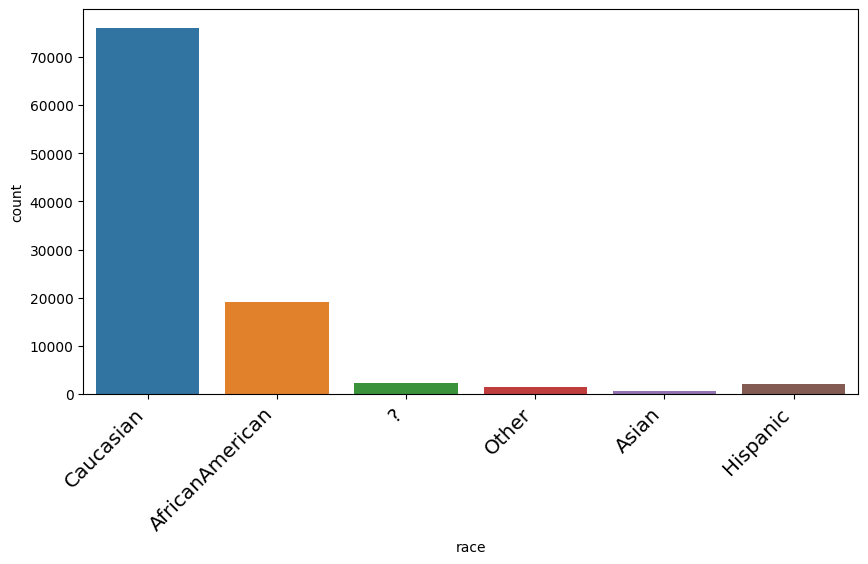

In [9]:
#Creating a histogram of our race variable to view its distribution:

plt.figure(figsize=(10,5))
chart = sns.countplot(x="race",data=diabetes_data)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '?'),
  Text(1, 0, '[75-100)'),
  Text(2, 0, '[50-75)'),
  Text(3, 0, '[0-25)'),
  Text(4, 0, '[100-125)'),
  Text(5, 0, '[25-50)'),
  Text(6, 0, '[125-150)'),
  Text(7, 0, '[175-200)'),
  Text(8, 0, '[150-175)'),
  Text(9, 0, '>200')])

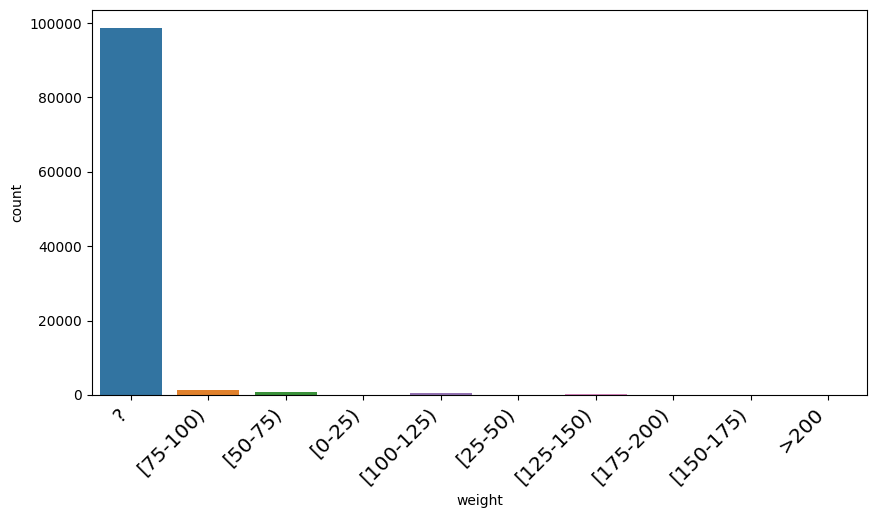

In [10]:
#Creating a histogram of our weight variable to view its distribution:

plt.figure(figsize=(10,5))
chart = sns.countplot(x="weight",data=diabetes_data)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, '?'),
  Text(1, 0, 'MC'),
  Text(2, 0, 'MD'),
  Text(3, 0, 'HM'),
  Text(4, 0, 'UN'),
  Text(5, 0, 'BC'),
  Text(6, 0, 'SP'),
  Text(7, 0, 'CP'),
  Text(8, 0, 'SI'),
  Text(9, 0, 'DM'),
  Text(10, 0, 'CM'),
  Text(11, 0, 'CH'),
  Text(12, 0, 'PO'),
  Text(13, 0, 'WC'),
  Text(14, 0, 'OT'),
  Text(15, 0, 'OG'),
  Text(16, 0, 'MP'),
  Text(17, 0, 'FR')])

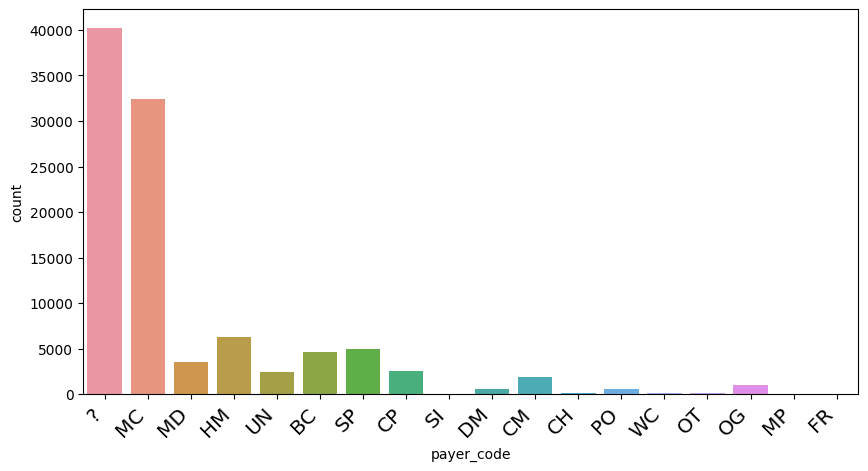

In [11]:
#Creating a histogram of our payer_code variable to view its distribution:

plt.figure(figsize=(10,5))
chart = sns.countplot(x="payer_code",data=diabetes_data)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

## Imputing Data:

In [12]:
# Creating a copy of our diabetes_data so as to avoid overwriting original data:

diabetes_copy = diabetes_data.copy()
diabetes_copy.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [13]:
#Replacing question marks with NaN values in our data:

diabetes_copy = diabetes_copy.replace('?', np.NaN)
print(diabetes_copy.isnull().sum())
print(diabetes_copy.isnull().sum()/len(diabetes_copy)*100)

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [14]:
#Dropping the weight column from our diabetes_copy DF due to it having 96% missing values:

diabetes_copy=diabetes_copy.drop(columns='weight')
diabetes_copy.head() #Verifying our weight column has been dropped.

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,NaN,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [15]:
#Imputing missing values in our race column with the mode (2.23% missing data):

def convert_na(df,col,val):
    df[[col]] = df[[col]].fillna(value=val)
    
fill_missing = ['race','payer_code','medical_specialty','diag_1','diag_2','diag_3']

for col in fill_missing:
    convert_na(df=diabetes_copy,col=col,val='MISSING')
    

In [16]:
#Last check to verify that all missing values have been imputed.
print(diabetes_copy.isnull().sum())

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitaz

In [17]:
#Creating a final copy of our diabetes data set to use for OHE:

diabetes_final = diabetes_copy.copy()
diabetes_final.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,MISSING,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,MISSING,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,MISSING,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,MISSING,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,MISSING,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [18]:
def convert_to_binary(df,col):
    if col=='readmitted':
        df[col]=np.where(df[col]=='NO',0,1)
    else:
        df[col]=np.where(df[col]=='No',0,1)
        
cov_cols = ['diabetesMed','change','readmitted']
for i in cov_cols:
    convert_to_binary(df=diabetes_final,col=i)

In [19]:
#Re-coding our "change" variable to a binary, continuous variable with values of 0 for No and 1 for Ch (change):
diabetes_final['change'].value_counts() # Verifying that our re-coding was successful

0    54755
1    47011
Name: change, dtype: int64

In [20]:
#Re-coding our "diabetesMed" variable to a binary, continuous variable with values of 0 for No and 1 for Yes:
diabetes_final['diabetesMed'].value_counts() # Verifying that our re-coding was successful

1    78363
0    23403
Name: diabetesMed, dtype: int64

In [21]:
#Re-coding our "readmitted" variable to a binary, continuous variable with values of 0 for No and 1 for Yes:

diabetes_final['readmitted'].value_counts() # Verifying that our re-coding was successful

0    54864
1    46902
Name: readmitted, dtype: int64

In [22]:
#Separating categorical and numeric data into two data frames for pre-pcoessing purposes: 

num_df2 = diabetes_final.select_dtypes(include=np.number)
display(num_df2)
cat_df2 = diabetes_final.select_dtypes(include=['object'])
display(cat_df2)

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed,readmitted
0,2278392,8222157,6,25,1,1,41,0,1,0,0,0,1,0,0,0
1,149190,55629189,1,1,7,3,59,0,18,0,0,0,9,1,1,1
2,64410,86047875,1,1,7,2,11,5,13,2,0,1,6,0,1,0
3,500364,82442376,1,1,7,2,44,1,16,0,0,0,7,1,1,0
4,16680,42519267,1,1,7,1,51,0,8,0,0,0,5,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,1,3,7,3,51,0,16,0,0,0,9,1,1,1
101762,443847782,74694222,1,4,5,5,33,3,18,0,0,1,9,0,1,0
101763,443854148,41088789,1,1,7,1,53,0,9,1,0,0,13,1,1,0
101764,443857166,31693671,2,3,7,10,45,2,21,0,0,1,9,1,1,0


,race,gender,age,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,...,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone
0,Caucasian,Female,[0-10),MISSING,Pediatrics-Endocrinology,250.83,MISSING,MISSING,None,None,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,[10-20),MISSING,MISSING,276,250.01,255,None,None,...,No,No,No,No,Up,No,No,No,No,No
2,AfricanAmerican,Female,[20-30),MISSING,MISSING,648,250,V27,None,None,...,No,No,No,No,No,No,No,No,No,No
3,Caucasian,Male,[30-40),MISSING,MISSING,8,250.43,403,None,None,...,No,No,No,No,Up,No,No,No,No,No
4,Caucasian,Male,[40-50),MISSING,MISSING,197,157,250,None,None,...,No,No,No,No,Steady,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),MC,MISSING,250.13,291,458,None,>8,...,No,No,No,No,Down,No,No,No,No,No
101762,AfricanAmerican,Female,[80-90),MC,MISSING,560,276,787,None,None,...,No,No,No,No,Steady,No,No,No,No,No
101763,Caucasian,Male,[70-80),MC,MISSING,38,590,296,None,None,...,No,No,No,No,Down,No,No,No,No,No
101764,Caucasian,Female,[80-90),MC,Surgery-General,996,285,998,None,None,...,No,No,No,No,Up,No,No,No,No,No


In [23]:
#For loop to calculate the counts of each categorical variable in our cat_df2 DF:

for col in cat_df2.columns:
    if cat_df2[col].dtype == 'object':
        print(cat_df2[col].value_counts()/len(cat_df2)*100)

Caucasian          74.778413
AfricanAmerican    18.876639
MISSING             2.233555
Hispanic            2.001651
Other               1.479866
Asian               0.629876
Name: race, dtype: float64
Female             53.758623
Male               46.238429
Unknown/Invalid     0.002948
Name: gender, dtype: float64
[70-80)     25.615628
[60-70)     22.092840
[50-60)     16.956547
[80-90)     16.898571
[40-50)      9.516931
[30-40)      3.709490
[90-100)     2.744532
[20-30)      1.628245
[10-20)      0.679009
[0-10)       0.158206
Name: age, dtype: float64
MISSING    39.557416
MC         31.876069
HM          6.165124
SP          4.920111
BC          4.574219
MD          3.470707
CP          2.489043
UN          2.405519
CM          1.903386
OG          1.015074
PO          0.581727
DM          0.539473
CH          0.143466
WC          0.132657
OT          0.093351
MP          0.077629
SI          0.054046
FR          0.000983
Name: payer_code, dtype: float64
MISSING                   

## Re-Coding Categorical Features For OHE:

In [24]:
#Creating a copy of our data frame to re-code categorical variables for OHE:

diabetes_final2 = diabetes_final.copy()
diabetes_final2.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,MISSING,...,No,No,No,No,No,No,No,0,0,0
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,MISSING,...,No,Up,No,No,No,No,No,1,1,1
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,MISSING,...,No,No,No,No,No,No,No,0,1,0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,MISSING,...,No,Up,No,No,No,No,No,1,1,0
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,MISSING,...,No,Steady,No,No,No,No,No,1,1,0


In [25]:
#Renaming columns for modeling purposes: 

diabetes_final2.rename(columns = {'glyburide-metformin':'glyburide_metformin','glipizide-metformin':'glipizide_metformin','glimepiride-pioglitazone':'glimepiride_pioglitazone','metformin-rosiglitazone':'metformin_rosiglitazone','metformin-pioglitazone':'metformin_pioglitazone'}, inplace = True)
diabetes_final2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   admission_type_id         101766 non-null  int64 
 6   discharge_disposition_id  101766 non-null  int64 
 7   admission_source_id       101766 non-null  int64 
 8   time_in_hospital          101766 non-null  int64 
 9   payer_code                101766 non-null  object
 10  medical_specialty         101766 non-null  object
 11  num_lab_procedures        101766 non-null  int64 
 12  num_procedures            101766 non-null  int64 
 13  num_medications           101766 non-null  int64 
 14  numb

In [26]:
def reduce_cat(df,col,val):
    df[col] = df[col].mask(df[col].map(df[col].value_counts(normalize=True)) < val,'Other')

reduce_cat(df = diabetes_final2,col='payer_code',val=0.02)
reduce_cat(df = diabetes_final2,col='medical_specialty',val=0.03)
reduce_cat(df = diabetes_final2,col='max_glu_serum',val=0.02)
reduce_cat(df = diabetes_final2,col='A1Cresult',val=0.08)
reduce_cat(df = diabetes_final2,col='metformin',val=0.1)
reduce_cat(df = diabetes_final2,col='repaglinide',val=0.01)
reduce_cat(df = diabetes_final2,col='nateglinide',val=0.9)
reduce_cat(df = diabetes_final2,col='chlorpropamide',val=0.9)
reduce_cat(df = diabetes_final2,col='glimepiride',val=0.9)
reduce_cat(df = diabetes_final2,col='glipizide',val=0.1)
reduce_cat(df = diabetes_final2,col='glyburide',val=0.09)
reduce_cat(df = diabetes_final2,col='pioglitazone',val=0.06)
reduce_cat(df = diabetes_final2,col='rosiglitazone',val=0.05)
reduce_cat(df = diabetes_final2,col='acarbose',val=0.9)
reduce_cat(df = diabetes_final2,col='miglitol',val=0.9)
reduce_cat(df = diabetes_final2,col='tolazamide',val=0.0004)
reduce_cat(df = diabetes_final2,col='glyburide_metformin',val=0.9)
reduce_cat(df = diabetes_final2,col='diag_1',val=0.0075)
reduce_cat(df = diabetes_final2,col='diag_2',val=0.0075)
reduce_cat(df = diabetes_final2,col='diag_3',val=0.0075)

In [27]:
#Separating categorical and numeric data into two data frames for pre-processing purposes: 

num_df3 = diabetes_final2.select_dtypes(include=np.number)
display(num_df2)
cat_df3 = diabetes_final2.select_dtypes(include=['object'])
display(cat_df3)

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed,readmitted
0,2278392,8222157,6,25,1,1,41,0,1,0,0,0,1,0,0,0
1,149190,55629189,1,1,7,3,59,0,18,0,0,0,9,1,1,1
2,64410,86047875,1,1,7,2,11,5,13,2,0,1,6,0,1,0
3,500364,82442376,1,1,7,2,44,1,16,0,0,0,7,1,1,0
4,16680,42519267,1,1,7,1,51,0,8,0,0,0,5,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,1,3,7,3,51,0,16,0,0,0,9,1,1,1
101762,443847782,74694222,1,4,5,5,33,3,18,0,0,1,9,0,1,0
101763,443854148,41088789,1,1,7,1,53,0,9,1,0,0,13,1,1,0
101764,443857166,31693671,2,3,7,10,45,2,21,0,0,1,9,1,1,0


,race,gender,age,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,...,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,metformin_rosiglitazone,metformin_pioglitazone
0,Caucasian,Female,[0-10),MISSING,Other,Other,Other,MISSING,None,None,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,[10-20),MISSING,MISSING,276,250.01,Other,None,None,...,No,No,No,No,Up,No,No,No,No,No
2,AfricanAmerican,Female,[20-30),MISSING,MISSING,Other,250,Other,None,None,...,No,No,No,No,No,No,No,No,No,No
3,Caucasian,Male,[30-40),MISSING,MISSING,Other,Other,403,None,None,...,No,No,No,No,Up,No,No,No,No,No
4,Caucasian,Male,[40-50),MISSING,MISSING,Other,Other,250,None,None,...,No,No,No,No,Steady,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),MC,MISSING,250.13,Other,Other,None,>8,...,No,No,No,No,Down,No,No,No,No,No
101762,AfricanAmerican,Female,[80-90),MC,MISSING,560,276,Other,None,None,...,No,No,No,No,Steady,No,No,No,No,No
101763,Caucasian,Male,[70-80),MC,MISSING,38,Other,Other,None,None,...,No,No,No,No,Down,No,No,No,No,No
101764,Caucasian,Female,[80-90),MC,Surgery-General,996,285,Other,None,None,...,No,No,No,No,Up,No,No,No,No,No


## Performing One Hot Encoding:

In [28]:
#Viewing columns needed to perform OHE on: 

cat_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 33 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      101766 non-null  object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   payer_code                101766 non-null  object
 4   medical_specialty         101766 non-null  object
 5   diag_1                    101766 non-null  object
 6   diag_2                    101766 non-null  object
 7   diag_3                    101766 non-null  object
 8   max_glu_serum             101766 non-null  object
 9   A1Cresult                 101766 non-null  object
 10  metformin                 101766 non-null  object
 11  repaglinide               101766 non-null  object
 12  nateglinide               101766 non-null  object
 13  chlorpropamide            101766 non-null  object
 14  glim

In [29]:
#Creating a copy of our cat_df3 DF to prevent overwriting our work and to ensure OHE performs as expected:

cat_final=cat_df3.copy()
cat_final.head()

,race,gender,age,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,...,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,metformin_rosiglitazone,metformin_pioglitazone
0,Caucasian,Female,[0-10),MISSING,Other,Other,Other,MISSING,None,None,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,[10-20),MISSING,MISSING,276,250.01,Other,None,None,...,No,No,No,No,Up,No,No,No,No,No
2,AfricanAmerican,Female,[20-30),MISSING,MISSING,Other,250,Other,None,None,...,No,No,No,No,No,No,No,No,No,No
3,Caucasian,Male,[30-40),MISSING,MISSING,Other,Other,403,None,None,...,No,No,No,No,Up,No,No,No,No,No
4,Caucasian,Male,[40-50),MISSING,MISSING,Other,Other,250,None,None,...,No,No,No,No,Steady,No,No,No,No,No


In [30]:
#Grabbing categorical columns from our cat_final DF for OHE:

column_names_for_onehot = cat_final.columns[0:]
column_names_for_onehot #Verifying all of our columns are in our variable.

Index(['race', 'gender', 'age', 'payer_code', 'medical_specialty', 'diag_1',
       'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide_metformin', 'glipizide_metformin',
       'glimepiride_pioglitazone', 'metformin_rosiglitazone',
       'metformin_pioglitazone'],
      dtype='object')

In [31]:
#Performing OHE on our categorical columns:

cat_ohe = pd.get_dummies(cat_final, columns=column_names_for_onehot, drop_first=False)
display(cat_ohe.head())
display(cat_ohe.info())

,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_MISSING,race_Other,gender_Female,gender_Male,gender_Unknown/Invalid,age_[0-10),...,glyburide_metformin_No,glyburide_metformin_Other,glipizide_metformin_No,glipizide_metformin_Steady,glimepiride_pioglitazone_No,glimepiride_pioglitazone_Steady,metformin_rosiglitazone_No,metformin_rosiglitazone_Steady,metformin_pioglitazone_No,metformin_pioglitazone_Steady
0,0,0,1,0,0,0,1,0,0,1,...,1,0,1,0,1,0,1,0,1,0
1,0,0,1,0,0,0,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0
3,0,0,1,0,0,0,0,1,0,0,...,1,0,1,0,1,0,1,0,1,0
4,0,0,1,0,0,0,0,1,0,0,...,1,0,1,0,1,0,1,0,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Columns: 181 entries, race_AfricanAmerican to metformin_pioglitazone_Steady
dtypes: uint8(181)
memory usage: 17.6 MB


None

In [32]:
#Merging our OHE DF with our num_df3 data frame to get a full complete data set. 
#Expecting to see 144 total columns. 

diabetes_clean = num_df3.join(cat_ohe)
pd.set_option('display.max_columns', None)
diabetes_clean

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed,readmitted,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_MISSING,race_Other,gender_Female,gender_Male,gender_Unknown/Invalid,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),payer_code_BC,payer_code_CP,payer_code_HM,payer_code_MC,payer_code_MD,payer_code_MISSING,payer_code_Other,payer_code_SP,payer_code_UN,medical_specialty_Cardiology,medical_specialty_Emergency/Trauma,medical_specialty_Family/GeneralPractice,medical_specialty_InternalMedicine,medical_specialty_MISSING,medical_specialty_Other,medical_specialty_Surgery-General,diag_1_250.13,diag_1_250.6,diag_1_250.7,diag_1_250.8,diag_1_276,diag_1_296,diag_1_38,diag_1_410,diag_1_414,diag_1_427,diag_1_428,diag_1_433,diag_1_434,diag_1_435,diag_1_440,diag_1_486,diag_1_491,diag_1_493,diag_1_518,diag_1_560,diag_1_562,diag_1_574,diag_1_577,diag_1_584,diag_1_599,diag_1_682,diag_1_715,diag_1_722,diag_1_780,diag_1_786,diag_1_820,diag_1_996,diag_1_998,diag_1_Other,diag_1_V57,diag_2_250,diag_2_250.01,diag_2_250.02,diag_2_250.6,diag_2_276,diag_2_285,diag_2_401,diag_2_403,diag_2_411,diag_2_413,diag_2_414,diag_2_424,diag_2_425,diag_2_427,diag_2_428,diag_2_486,diag_2_491,diag_2_493,diag_2_496,diag_2_518,diag_2_584,diag_2_585,diag_2_599,diag_2_682,diag_2_707,diag_2_780,diag_2_Other,diag_3_250,diag_3_250.01,diag_3_250.02,diag_3_250.6,diag_3_272,diag_3_276,diag_3_285,diag_3_305,diag_3_401,diag_3_403,diag_3_414,diag_3_424,diag_3_425,diag_3_427,diag_3_428,diag_3_496,diag_3_518,diag_3_584,diag_3_585,diag_3_599,diag_3_682,diag_3_707,diag_3_780,diag_3_MISSING,diag_3_Other,diag_3_V45,max_glu_serum_None,max_glu_serum_Norm,max_glu_serum_Other,A1Cresult_>8,A1Cresult_None,A1Cresult_Other,metformin_No,metformin_Other,metformin_Steady,repaglinide_No,repaglinide_Other,repaglinide_Steady,nateglinide_No,nateglinide_Other,chlorpropamide_No,chlorpropamide_Other,glimepiride_No,glimepiride_Other,acetohexamide_No,acetohexamide_Steady,glipizide_No,glipizide_Other,glipizide_Steady,glyburide_No,glyburide_Other,glyburide_Steady,tolbutamide_No,tolbutamide_Steady,pioglitazone_No,pioglitazone_Other,pioglitazone_Steady,rosiglitazone_No,rosiglitazone_Other,rosiglitazone_Steady,acarbose_No,acarbose_Other,miglitol_No,miglitol_Other,troglitazone_No,troglitazone_Steady,tolazamide_No,tolazamide_Other,examide_No,citoglipton_No,insulin_Down,insulin_No,insulin_Steady,insulin_Up,glyburide_metformin_No,glyburide_metformin_Other,glipizide_metformin_No,glipizide_metformin_Steady,glimepiride_pioglitazone_No,glimepiride_pioglitazone_Steady,metformin_rosiglitazone_No,metformin_rosiglitazone_Steady,metformin_pioglitazone_No,metformin_pioglitazone_Steady
0,2278392,8222157,6,25,1,1,41,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0
1,149190,55629189,1,1,7,3,59,0,18,0,0,0,9,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0
2,64410,86047875,1,1,7,2,11,5,13,2,0,1,6,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

## EDA:

/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


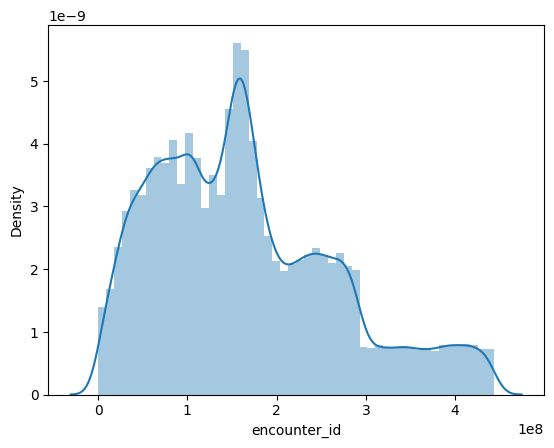

/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


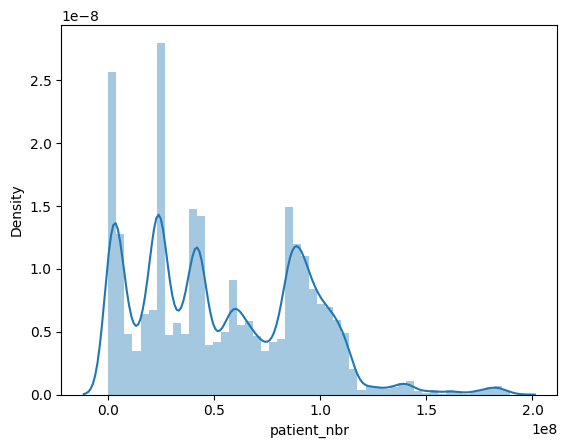

/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


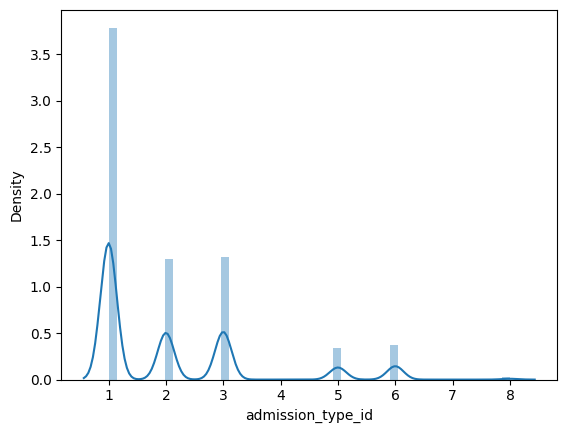

/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


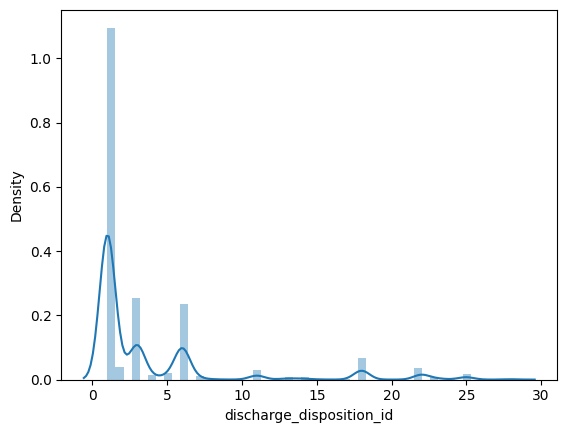

/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


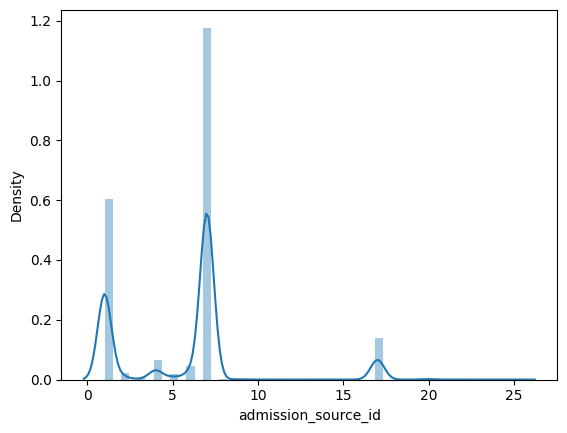

/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


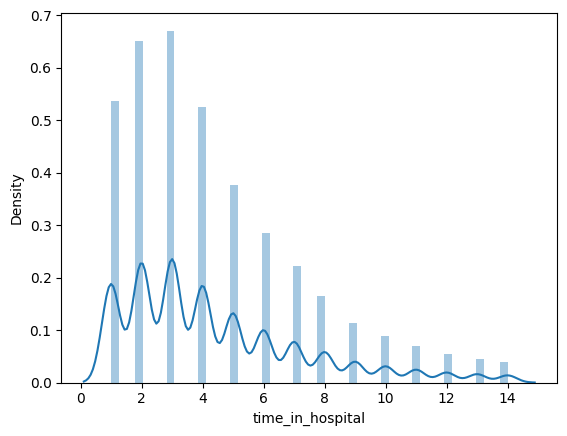

/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


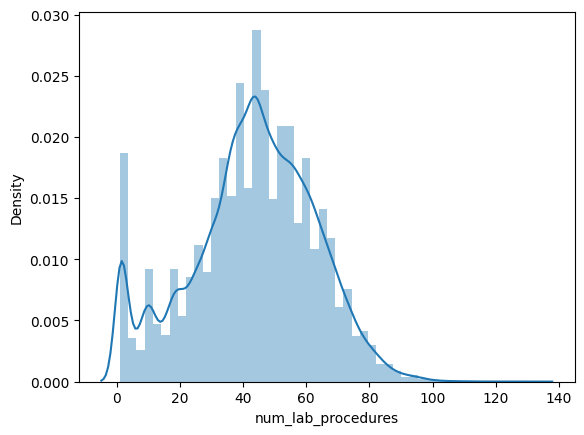

/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


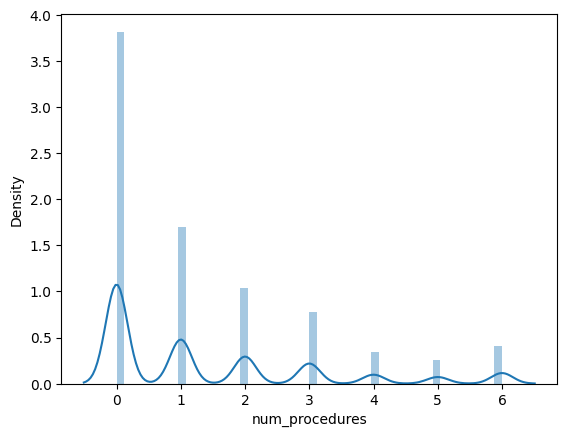

/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


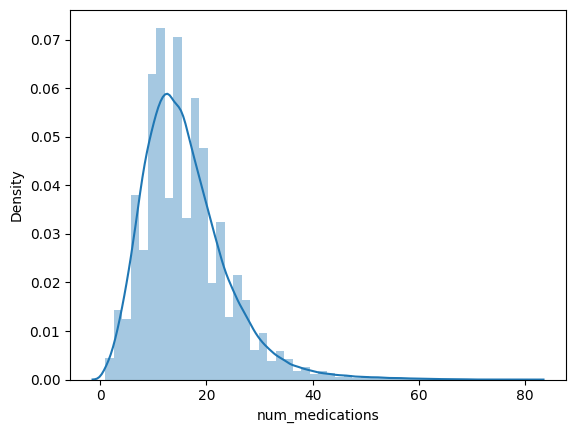

/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


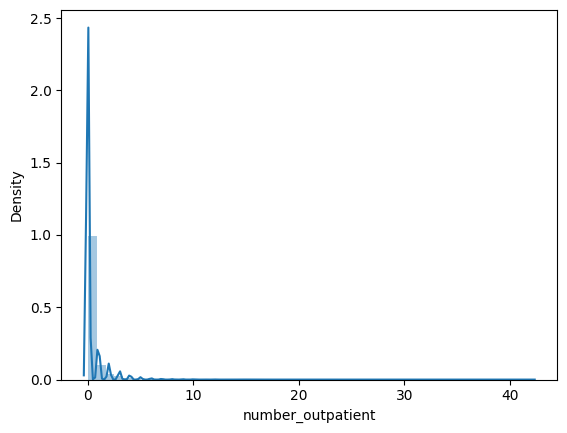

/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


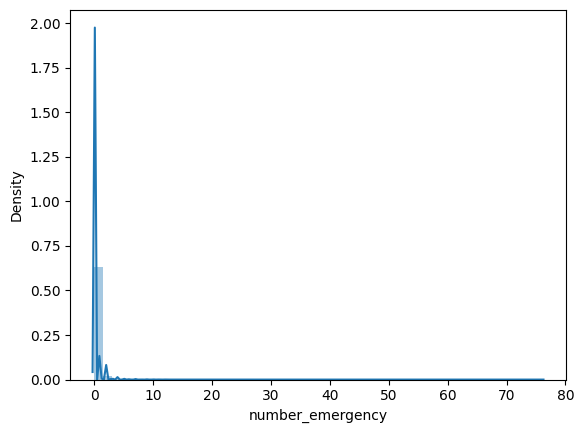

/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


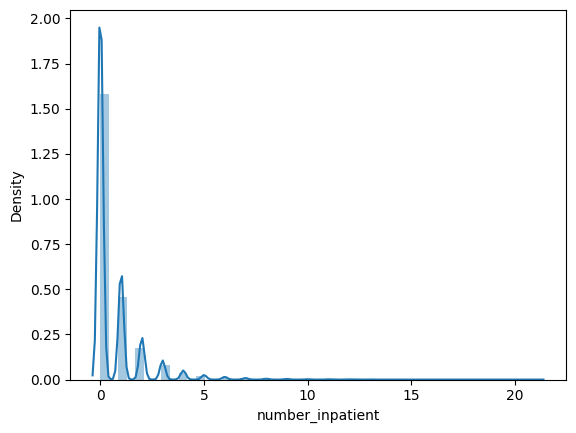

/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


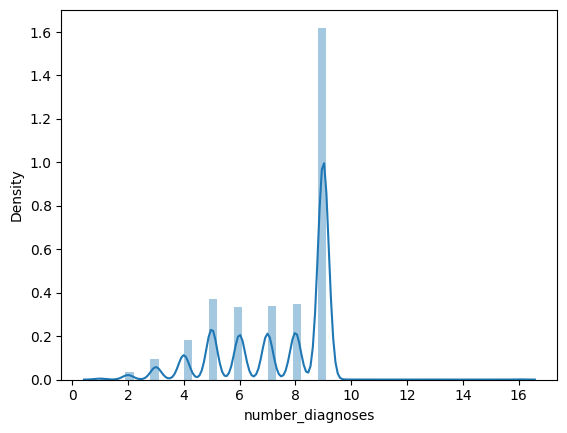

/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


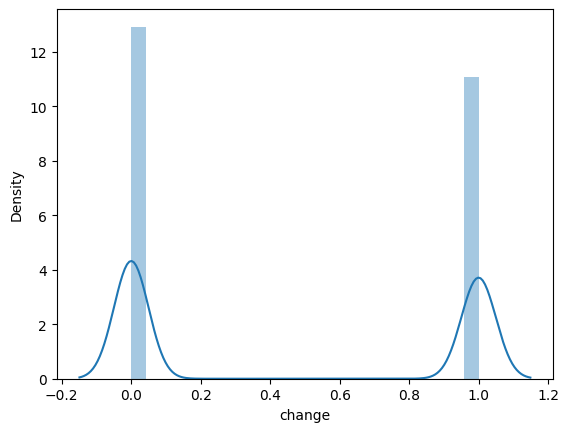

/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


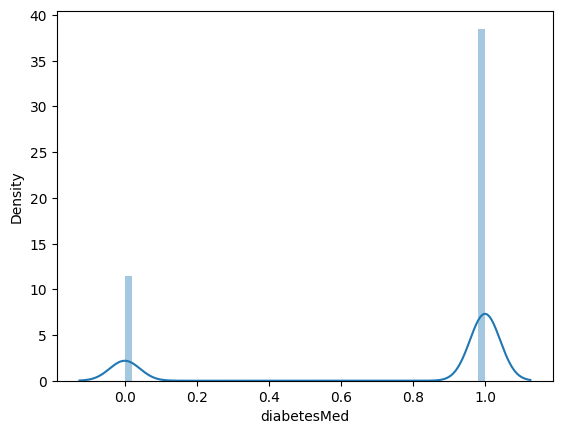

/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


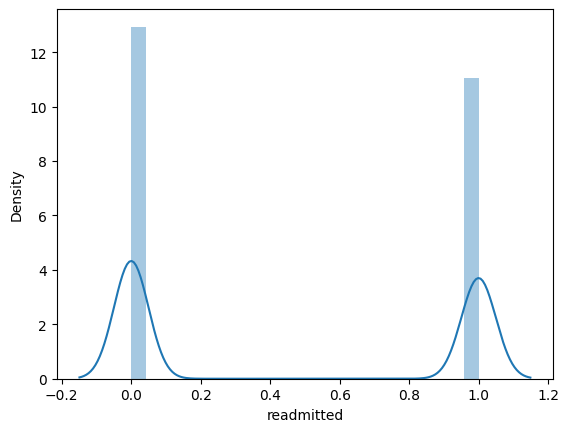

In [33]:
#Looping through diabetes_clean DF to view the distribution of all my variables:

for i in num_df3.columns:
    sns.distplot(num_df3[i])
    plt.show()

In [34]:
#Creating a correlation plot to identify multicollinearity issues:

diabetes_clean.corr()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed,readmitted,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_MISSING,race_Other,gender_Female,gender_Male,gender_Unknown/Invalid,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),payer_code_BC,payer_code_CP,payer_code_HM,payer_code_MC,payer_code_MD,payer_code_MISSING,payer_code_Other,payer_code_SP,payer_code_UN,medical_specialty_Cardiology,medical_specialty_Emergency/Trauma,medical_specialty_Family/GeneralPractice,medical_specialty_InternalMedicine,medical_specialty_MISSING,medical_specialty_Other,medical_specialty_Surgery-General,diag_1_250.13,diag_1_250.6,diag_1_250.7,diag_1_250.8,diag_1_276,diag_1_296,diag_1_38,diag_1_410,diag_1_414,diag_1_427,diag_1_428,diag_1_433,diag_1_434,diag_1_435,diag_1_440,diag_1_486,diag_1_491,diag_1_493,diag_1_518,diag_1_560,diag_1_562,diag_1_574,diag_1_577,diag_1_584,diag_1_599,diag_1_682,diag_1_715,diag_1_722,diag_1_780,diag_1_786,diag_1_820,diag_1_996,diag_1_998,diag_1_Other,diag_1_V57,diag_2_250,diag_2_250.01,diag_2_250.02,diag_2_250.6,diag_2_276,diag_2_285,diag_2_401,diag_2_403,diag_2_411,diag_2_413,diag_2_414,diag_2_424,diag_2_425,diag_2_427,diag_2_428,diag_2_486,diag_2_491,diag_2_493,diag_2_496,diag_2_518,diag_2_584,diag_2_585,diag_2_599,diag_2_682,diag_2_707,diag_2_780,diag_2_Other,diag_3_250,diag_3_250.01,diag_3_250.02,diag_3_250.6,diag_3_272,diag_3_276,diag_3_285,diag_3_305,diag_3_401,diag_3_403,diag_3_414,diag_3_424,diag_3_425,diag_3_427,diag_3_428,diag_3_496,diag_3_518,diag_3_584,diag_3_585,diag_3_599,diag_3_682,diag_3_707,diag_3_780,diag_3_MISSING,diag_3_Other,diag_3_V45,max_glu_serum_None,max_glu_serum_Norm,max_glu_serum_Other,A1Cresult_>8,A1Cresult_None,A1Cresult_Other,metformin_No,metformin_Other,metformin_Steady,repaglinide_No,repaglinide_Other,repaglinide_Steady,nateglinide_No,nateglinide_Other,chlorpropamide_No,chlorpropamide_Other,glimepiride_No,glimepiride_Other,acetohexamide_No,acetohexamide_Steady,glipizide_No,glipizide_Other,glipizide_Steady,glyburide_No,glyburide_Other,glyburide_Steady,tolbutamide_No,tolbutamide_Steady,pioglitazone_No,pioglitazone_Other,pioglitazone_Steady,rosiglitazone_No,rosiglitazone_Other,rosiglitazone_Steady,acarbose_No,acarbose_Other,miglitol_No,miglitol_Other,troglitazone_No,troglitazone_Steady,tolazamide_No,tolazamide_Other,examide_No,citoglipton_No,insulin_Down,insulin_No,insulin_Steady,insulin_Up,glyburide_metformin_No,glyburide_metformin_Other,glipizide_metformin_No,glipizide_metformin_Steady,glimepiride_pioglitazone_No,glimepiride_pioglitazone_Steady,metformin_rosiglitazone_No,metformin_rosiglitazone_Steady,metformin_pioglitazone_No,metformin_pioglitazone_Steady
encounter_id,1.000000,0.512028,-0.158961,-0.132876,-0.112402,-0.062221,-0.026062,-0.014225,0.076113,0.103756,0.082803,0.030962,0.265149,0.096372,0.051817,-0.038267,-0.094322,0.030217,0.061026,0.013427,0.011315,0.036972,-0.006009,0.005992,0.001539,-0.035857,-0.038612,-0.006851,-0.022480,-0.026721,-0.019668,0.010811,-0.011287,0.054864,0.029474,0.090668,0.070734,0.121625,0.293976,0.094673,-0.552349,0.148123,0.114449,0.006213,-0.088364,0.124931,-0.136158,-0.164851,0.245643,-0.110823,-0.027366,-0.009874,-0.002053,-0.011225,0.015826,0.002261,-0.004055,0.023019,-0.020184,-0.044144,0.015538,-0.010906,-0.016563,-0.005905,-0.003404,-0.008253,0.005471,0.042015,0.015737,0.037289,0.007036,0.005436,0.002088,-0.005323,0.034560,0.019120,0.004929,0.019765,-0.019770,0.000818,-0.030125,0.005858,-0.008647,-0.006307,0.006817,-0.026566,-0.025551,-0.087286,-0.018394,-0.027481,-0.001989,0.032604,-0.014764,-0.037404,-0.044382,-0.017631,0.003445,-0.023017,-0.005006,-0.014852,-0.028394,0.044846,0.016652,-0.004712,-0.034335,0.032310,0.077850,0.098726,0.016200,0.003004,0.007369,-0.014533,0.0

<Figure size 640x480 with 0 Axes>

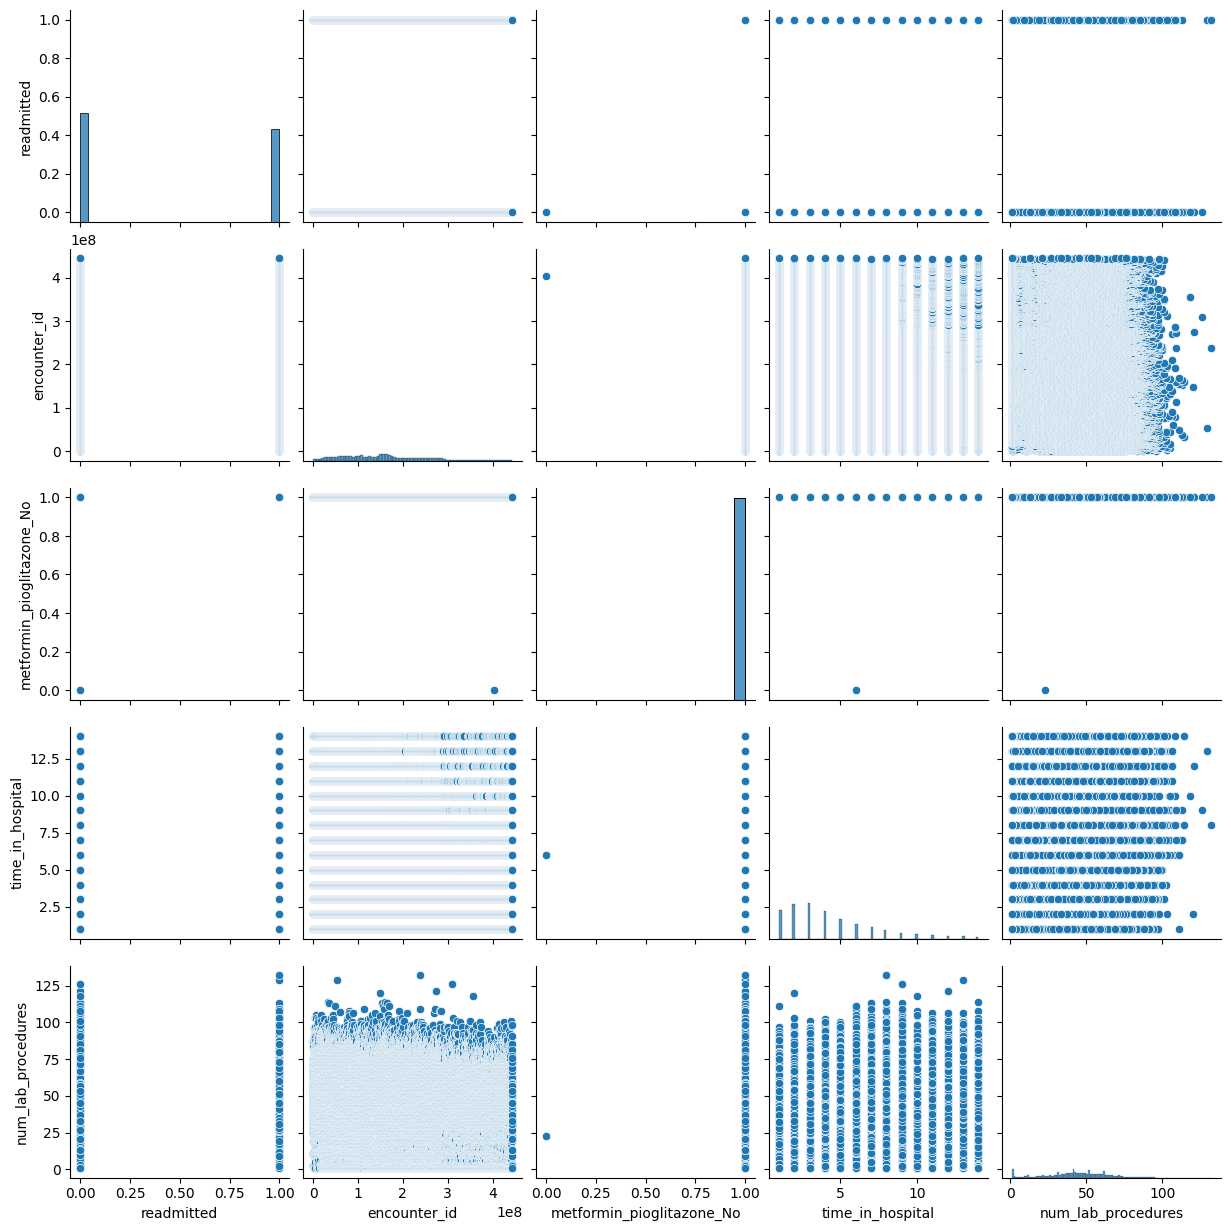

In [35]:
# Creating pairplots for several of the columns in our data set to view their distributions:

plt.figure()
sns.pairplot(diabetes_clean[['readmitted','encounter_id', 'metformin_pioglitazone_No', 'time_in_hospital','num_lab_procedures']])
plt.show()

## Logistic Regression Assumptions:

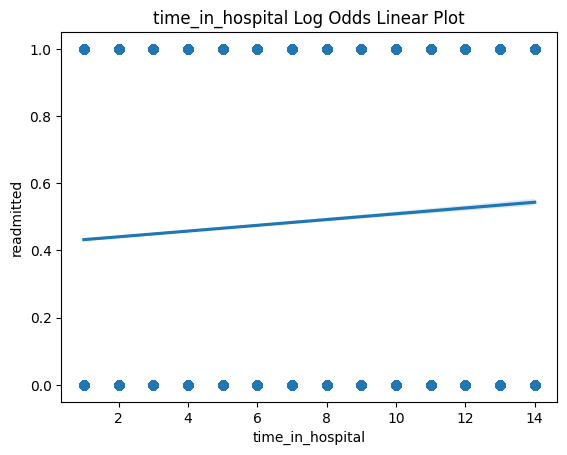

In [36]:
#Assumption 1: The IVs have a linear relationship to the log loss of our response:
#Code adapted from: https://pythonfordatascienceorg.wordpress.com/logistic-regression-python/
plt.figure()
sns.regplot(x= 'time_in_hospital', y= 'readmitted', data= diabetes_clean, logistic= True).set_title("time_in_hospital Log Odds Linear Plot")
plt.show();

Text(0.5, 1.0, 'num_medications Log Odds Linear Plot')

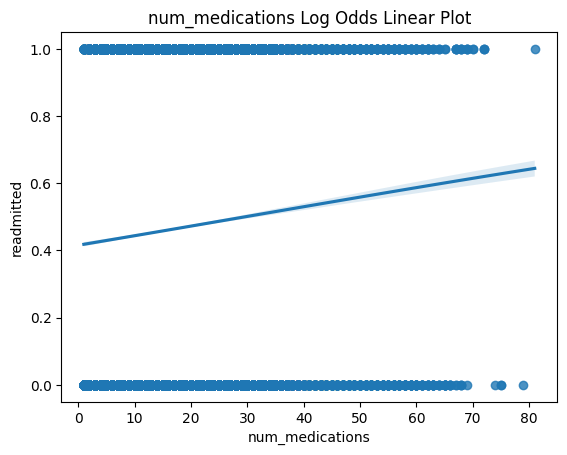

In [37]:
#Assumption 1: The IVs have a linear relationship to the log loss of our response:
#Code adapted from: https://pythonfordatascienceorg.wordpress.com/logistic-regression-python/

sns.regplot(x= 'num_medications', y= 'readmitted', data= diabetes_clean, logistic= True).set_title("num_medications Log Odds Linear Plot")

In [38]:
#Assumption 2: Absence of multicollinearity:

diabetes_clean.corr()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed,readmitted,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_MISSING,race_Other,gender_Female,gender_Male,gender_Unknown/Invalid,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),payer_code_BC,payer_code_CP,payer_code_HM,payer_code_MC,payer_code_MD,payer_code_MISSING,payer_code_Other,payer_code_SP,payer_code_UN,medical_specialty_Cardiology,medical_specialty_Emergency/Trauma,medical_specialty_Family/GeneralPractice,medical_specialty_InternalMedicine,medical_specialty_MISSING,medical_specialty_Other,medical_specialty_Surgery-General,diag_1_250.13,diag_1_250.6,diag_1_250.7,diag_1_250.8,diag_1_276,diag_1_296,diag_1_38,diag_1_410,diag_1_414,diag_1_427,diag_1_428,diag_1_433,diag_1_434,diag_1_435,diag_1_440,diag_1_486,diag_1_491,diag_1_493,diag_1_518,diag_1_560,diag_1_562,diag_1_574,diag_1_577,diag_1_584,diag_1_599,diag_1_682,diag_1_715,diag_1_722,diag_1_780,diag_1_786,diag_1_820,diag_1_996,diag_1_998,diag_1_Other,diag_1_V57,diag_2_250,diag_2_250.01,diag_2_250.02,diag_2_250.6,diag_2_276,diag_2_285,diag_2_401,diag_2_403,diag_2_411,diag_2_413,diag_2_414,diag_2_424,diag_2_425,diag_2_427,diag_2_428,diag_2_486,diag_2_491,diag_2_493,diag_2_496,diag_2_518,diag_2_584,diag_2_585,diag_2_599,diag_2_682,diag_2_707,diag_2_780,diag_2_Other,diag_3_250,diag_3_250.01,diag_3_250.02,diag_3_250.6,diag_3_272,diag_3_276,diag_3_285,diag_3_305,diag_3_401,diag_3_403,diag_3_414,diag_3_424,diag_3_425,diag_3_427,diag_3_428,diag_3_496,diag_3_518,diag_3_584,diag_3_585,diag_3_599,diag_3_682,diag_3_707,diag_3_780,diag_3_MISSING,diag_3_Other,diag_3_V45,max_glu_serum_None,max_glu_serum_Norm,max_glu_serum_Other,A1Cresult_>8,A1Cresult_None,A1Cresult_Other,metformin_No,metformin_Other,metformin_Steady,repaglinide_No,repaglinide_Other,repaglinide_Steady,nateglinide_No,nateglinide_Other,chlorpropamide_No,chlorpropamide_Other,glimepiride_No,glimepiride_Other,acetohexamide_No,acetohexamide_Steady,glipizide_No,glipizide_Other,glipizide_Steady,glyburide_No,glyburide_Other,glyburide_Steady,tolbutamide_No,tolbutamide_Steady,pioglitazone_No,pioglitazone_Other,pioglitazone_Steady,rosiglitazone_No,rosiglitazone_Other,rosiglitazone_Steady,acarbose_No,acarbose_Other,miglitol_No,miglitol_Other,troglitazone_No,troglitazone_Steady,tolazamide_No,tolazamide_Other,examide_No,citoglipton_No,insulin_Down,insulin_No,insulin_Steady,insulin_Up,glyburide_metformin_No,glyburide_metformin_Other,glipizide_metformin_No,glipizide_metformin_Steady,glimepiride_pioglitazone_No,glimepiride_pioglitazone_Steady,metformin_rosiglitazone_No,metformin_rosiglitazone_Steady,metformin_pioglitazone_No,metformin_pioglitazone_Steady
encounter_id,1.000000,0.512028,-0.158961,-0.132876,-0.112402,-0.062221,-0.026062,-0.014225,0.076113,0.103756,0.082803,0.030962,0.265149,0.096372,0.051817,-0.038267,-0.094322,0.030217,0.061026,0.013427,0.011315,0.036972,-0.006009,0.005992,0.001539,-0.035857,-0.038612,-0.006851,-0.022480,-0.026721,-0.019668,0.010811,-0.011287,0.054864,0.029474,0.090668,0.070734,0.121625,0.293976,0.094673,-0.552349,0.148123,0.114449,0.006213,-0.088364,0.124931,-0.136158,-0.164851,0.245643,-0.110823,-0.027366,-0.009874,-0.002053,-0.011225,0.015826,0.002261,-0.004055,0.023019,-0.020184,-0.044144,0.015538,-0.010906,-0.016563,-0.005905,-0.003404,-0.008253,0.005471,0.042015,0.015737,0.037289,0.007036,0.005436,0.002088,-0.005323,0.034560,0.019120,0.004929,0.019765,-0.019770,0.000818,-0.030125,0.005858,-0.008647,-0.006307,0.006817,-0.026566,-0.025551,-0.087286,-0.018394,-0.027481,-0.001989,0.032604,-0.014764,-0.037404,-0.044382,-0.017631,0.003445,-0.023017,-0.005006,-0.014852,-0.028394,0.044846,0.016652,-0.004712,-0.034335,0.032310,0.077850,0.098726,0.016200,0.003004,0.007369,-0.014533,0.0

<Figure size 640x480 with 0 Axes>

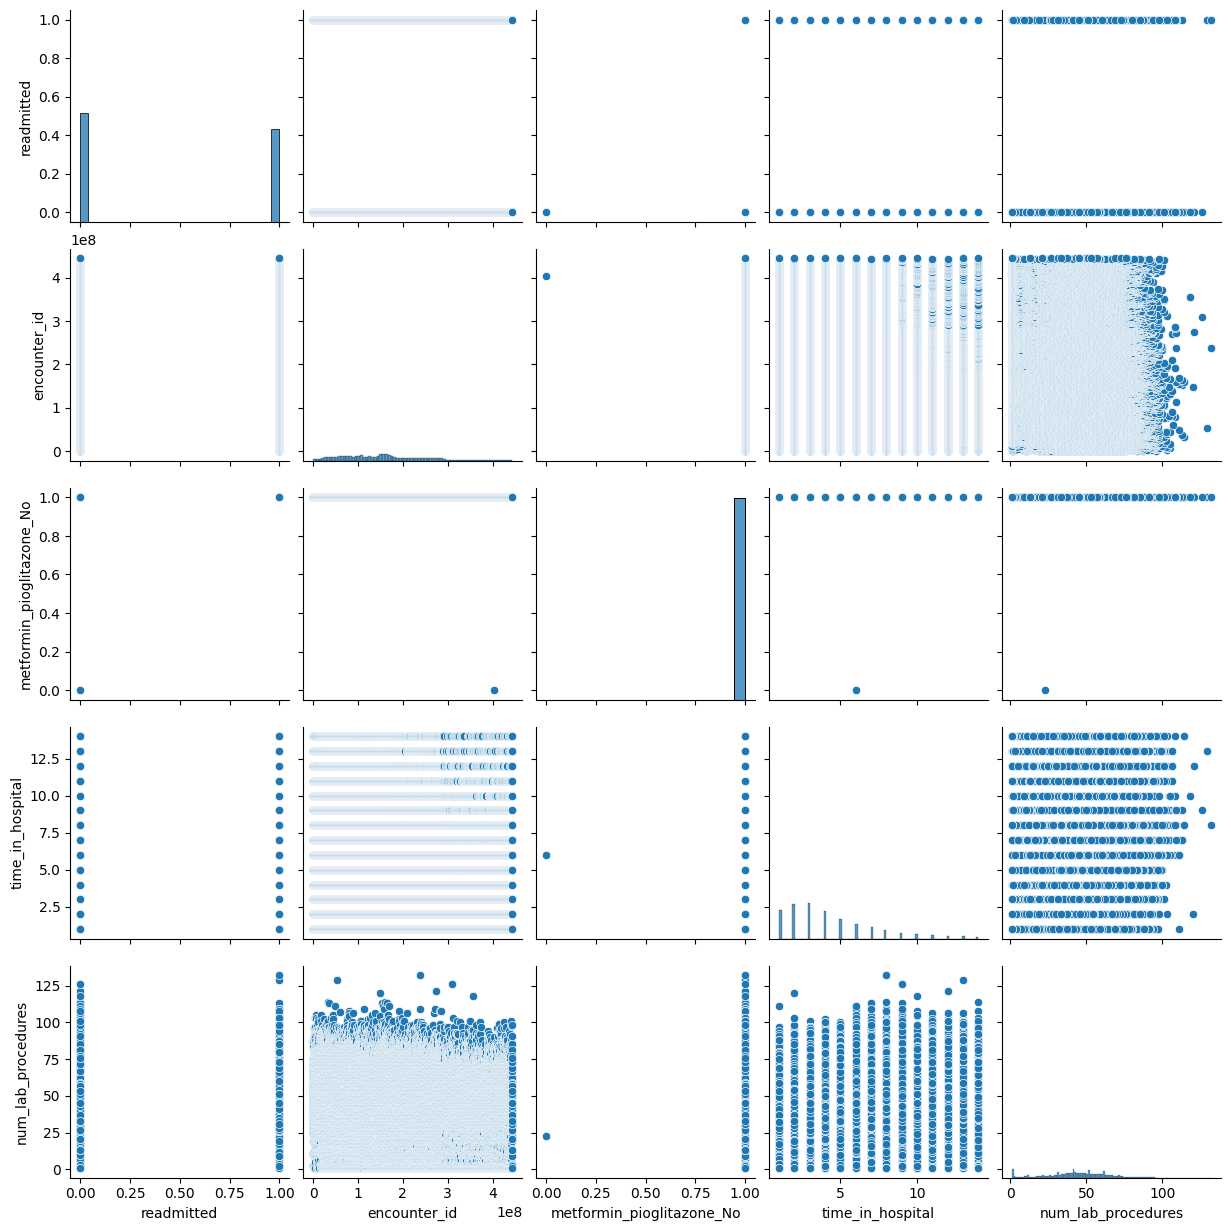

In [39]:
#Assumption 3: Lack of outliers:
plt.figure()
sns.pairplot(diabetes_clean[['readmitted','encounter_id', 'metformin_pioglitazone_No', 'time_in_hospital','num_lab_procedures']])
plt.show();


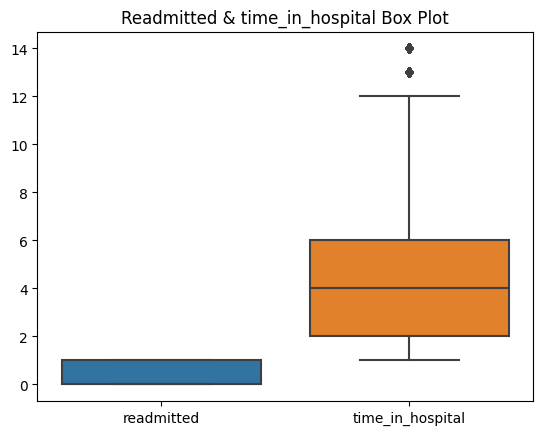

In [40]:
#Assumption 3: Lack of outliers:

display(box = sns.boxplot(data= diabetes_clean[['readmitted', 'time_in_hospital']]).set_title("Readmitted & time_in_hospital Box Plot"))


## Selecting Scalers:

In [41]:
# Setting our seed:

seed = 7 
np.random.seed(seed) 

In [42]:
# Splitting our data set into features and a target. 

target_cols = ['readmitted']
feature_cols = diabetes_clean.loc[:, ~diabetes_clean.columns.isin(target_cols)].columns

X = diabetes_clean[feature_cols] # Features
y = diabetes_clean.readmitted # Target variable

In [43]:
X.shape

(101766, 196)

In [44]:
diabetes_clean.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed,readmitted,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_MISSING,race_Other,gender_Female,gender_Male,gender_Unknown/Invalid,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),payer_code_BC,payer_code_CP,payer_code_HM,payer_code_MC,payer_code_MD,payer_code_MISSING,payer_code_Other,payer_code_SP,payer_code_UN,medical_specialty_Cardiology,medical_specialty_Emergency/Trauma,medical_specialty_Family/GeneralPractice,medical_specialty_InternalMedicine,medical_specialty_MISSING,medical_specialty_Other,medical_specialty_Surgery-General,diag_1_250.13,diag_1_250.6,diag_1_250.7,diag_1_250.8,diag_1_276,diag_1_296,diag_1_38,diag_1_410,diag_1_414,diag_1_427,diag_1_428,diag_1_433,diag_1_434,diag_1_435,diag_1_440,diag_1_486,diag_1_491,diag_1_493,diag_1_518,diag_1_560,diag_1_562,diag_1_574,diag_1_577,diag_1_584,diag_1_599,diag_1_682,diag_1_715,diag_1_722,diag_1_780,diag_1_786,diag_1_820,diag_1_996,diag_1_998,diag_1_Other,diag_1_V57,diag_2_250,diag_2_250.01,diag_2_250.02,diag_2_250.6,diag_2_276,diag_2_285,diag_2_401,diag_2_403,diag_2_411,diag_2_413,diag_2_414,diag_2_424,diag_2_425,diag_2_427,diag_2_428,diag_2_486,diag_2_491,diag_2_493,diag_2_496,diag_2_518,diag_2_584,diag_2_585,diag_2_599,diag_2_682,diag_2_707,diag_2_780,diag_2_Other,diag_3_250,diag_3_250.01,diag_3_250.02,diag_3_250.6,diag_3_272,diag_3_276,diag_3_285,diag_3_305,diag_3_401,diag_3_403,diag_3_414,diag_3_424,diag_3_425,diag_3_427,diag_3_428,diag_3_496,diag_3_518,diag_3_584,diag_3_585,diag_3_599,diag_3_682,diag_3_707,diag_3_780,diag_3_MISSING,diag_3_Other,diag_3_V45,max_glu_serum_None,max_glu_serum_Norm,max_glu_serum_Other,A1Cresult_>8,A1Cresult_None,A1Cresult_Other,metformin_No,metformin_Other,metformin_Steady,repaglinide_No,repaglinide_Other,repaglinide_Steady,nateglinide_No,nateglinide_Other,chlorpropamide_No,chlorpropamide_Other,glimepiride_No,glimepiride_Other,acetohexamide_No,acetohexamide_Steady,glipizide_No,glipizide_Other,glipizide_Steady,glyburide_No,glyburide_Other,glyburide_Steady,tolbutamide_No,tolbutamide_Steady,pioglitazone_No,pioglitazone_Other,pioglitazone_Steady,rosiglitazone_No,rosiglitazone_Other,rosiglitazone_Steady,acarbose_No,acarbose_Other,miglitol_No,miglitol_Other,troglitazone_No,troglitazone_Steady,tolazamide_No,tolazamide_Other,examide_No,citoglipton_No,insulin_Down,insulin_No,insulin_Steady,insulin_Up,glyburide_metformin_No,glyburide_metformin_Other,glipizide_metformin_No,glipizide_metformin_Steady,glimepiride_pioglitazone_No,glimepiride_pioglitazone_Steady,metformin_rosiglitazone_No,metformin_rosiglitazone_Steady,metformin_pioglitazone_No,metformin_pioglitazone_Steady
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.0000

In [80]:
%%time
from random import Random
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV,HalvingRandomSearchCV,RandomizedSearchCV
from sklearn.preprocessing import RobustScaler,PowerTransformer


kfcv = KFold( 
              n_splits=10,
              random_state=0,
              shuffle=True
            )

lr_grid = { 
            "C":        np.logspace(-3,3,7), 
            "l1_ratio": np.arange(0.0,1.0,0.1),
            'solver':   ['saga'],
            'penalty':  ['elasticnet'],
            "tol":      [1e-9,1e-8,1e-7,1e-6,1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
          }

model_lr = LogisticRegression(
                                random_state = 0,
                                max_iter=100000,
                                n_jobs = -1,
                             )

f_select = SelectPercentile(
                              score_func = f_regression,
                              percentile = 30
                           )

logreg_gs = HalvingRandomSearchCV(     
                                  model_lr,
                                  lr_grid,
                                  cv = kfcv,
                                  verbose = 1,
                                  scoring = 'f1',
                                  n_jobs=-1,
                               )

#create columns to scale
scale_cols = list(num_df3.columns.intersection(X.columns))
scaler = PowerTransformer()

pre_processing = ColumnTransformer(
                                    transformers = [("scaler", scaler, scale_cols)],
                                    remainder='passthrough',
                                    n_jobs = -1
                                  )

clf = Pipeline(
                steps=[ ("scaler", pre_processing),
                        ("f_select", f_select),
                        ("gridsearch", logreg_gs)
                      ]
              )
#@ignore_warnings(category=ConvergenceWarning)
clf.fit(X,y)

n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 8
min_resources_: 40
max_resources_: 101766
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 630
n_resources: 40
Fitting 10 folds for each of 630 candidates, totalling 6300 fits


/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 630 is smaller than n_iter=2544. Running 630 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/sklearn/metrics/_class

----------
iter: 1
n_candidates: 210
n_resources: 120
Fitting 10 folds for each of 210 candidates, totalling 2100 fits


/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/allen/virtualenvs/QTW/lib/python3

----------
iter: 2
n_candidates: 70
n_resources: 360
Fitting 10 folds for each of 70 candidates, totalling 700 fits


/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/allen/virtualenvs/QTW/lib/python3

----------
iter: 3
n_candidates: 24
n_resources: 1080
Fitting 10 folds for each of 24 candidates, totalling 240 fits


/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/allen/virtualenvs/QTW/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


----------
iter: 4
n_candidates: 8
n_resources: 3240
Fitting 10 folds for each of 8 candidates, totalling 80 fits
----------
iter: 5
n_candidates: 3
n_resources: 9720
Fitting 10 folds for each of 3 candidates, totalling 30 fits
CPU times: user 5.29 s, sys: 2.78 s, total: 8.07 s
Wall time: 14min 15s


Pipeline(steps=[('scaler',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('scaler', PowerTransformer(),
                                                  ['encounter_id',
                                                   'patient_nbr',
                                                   'admission_type_id',
                                                   'discharge_disposition_id',
                                                   'admission_source_id',
                                                   'time_in_hospital',
                                                   'num_lab_procedures',
                                                   'num_procedures',
                                                   'num_medications',
                                                   'number_outpatient',
                                                   'number_emergency',
                                                   'number_inpatien...
                                       estimator=LogisticRegression(max_iter=100000,
                                                                    n_jobs=-1,
                                                                    random_state=0),
                                       n_jobs=-1,
                                       param_distributions={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                                            'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                                            'penalty': ['elasticnet'],
                                                            'solver': ['saga'],
                                                            'tol': [1e-09,
                                                                    1e-08,
                                                                    1e-07,
                                                                    1e-06,
                                                                    1e-05,
                                                                    0.0001,
                                                                    0.001, 0.01,
                                                                    0.1]},
                                       scoring='f1', verbose=1))])

In [81]:
best_params = clf.named_steps.gridsearch.best_params_
best_score = clf.named_steps.gridsearch.best_score_
print(f'Grid Search Best Parameters: {best_params}')
print(f'Grid Search Best F1 Score: {best_score}')

Grid Search Best Parameters: {'tol': 0.01, 'solver': 'saga', 'penalty': 'elasticnet', 'l1_ratio': 0.9, 'C': 1.0}
Grid Search Best F1 Score: 0.5661951091521805


In [82]:
#https://towardsdatascience.com/getting-the-most-out-of-scikit-learn-pipelines-c2afc4410f1a

from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegressionCV
model_ = LogisticRegression(  
                                random_state = 0,
                                tol=0.001,
                                solver='saga',
                                penalty='elasticnet',
                                l1_ratio=0.8,
                                C=100.0,
                                n_jobs= -1
                                )

f_select = SelectPercentile(    
                                score_func = f_regression,
                                percentile = 30
                           )

pre_processing = ColumnTransformer(
                                    transformers = [("scaler", scaler, scale_cols)],
                                    remainder='passthrough',
                                    n_jobs = -1
                                  )

model_score = cross_validate(model_, X, y,
                            scoring='accuracy',
                            cv=kfcv,
                            return_estimator=True,
                            n_jobs=-1,
                            return_train_score=True)


pipe = Pipeline(
                                steps=[
                                        ("scaler", pre_processing),
                                        ('f_select', f_select),
                                        ("model", model_score)
                                      ]
               )



In [83]:
model_results = pd.DataFrame(pipe.named_steps.model)
model_results.loc['MEAN'] = model_results.mean()
print(model_results.to_markdown())

|      |   fit_time |   score_time | estimator                                                                  |   test_score |   train_score |
|:-----|-----------:|-------------:|:---------------------------------------------------------------------------|-------------:|--------------:|
| 0    |    2.79806 |   0.00683784 | LogisticRegression(C=100.0, l1_ratio=0.8, n_jobs=-1, penalty='elasticnet', |     0.568733 |      0.568562 |
|      |            |              |                    random_state=0, solver='saga', tol=0.001)               |              |               |
| 1    |    3.08698 |   0.00623727 | LogisticRegression(C=100.0, l1_ratio=0.8, n_jobs=-1, penalty='elasticnet', |     0.56834  |      0.568627 |
|      |            |              |                    random_state=0, solver='saga', tol=0.001)               |              |               |
| 2    |    3.93618 |   0.00589871 | LogisticRegression(C=100.0, l1_ratio=0.8, n_jobs=-1, penalty='elasticnet', |     0.567456 |  

/var/folders/cn/_lgzxbk177j14_b82nbl10br0000gn/T/ipykernel_92676/2537059140.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  model_results.loc['MEAN'] = model_results.mean()
